In [73]:
# Data Handling Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('./final_df.csv', index_col='Unnamed: 0')
df

,Age,AverageLeadTime,RoomNights,SRHighFloor,SRCrib,SRKingSizeBed,SRTwinBed,SRQuietRoom,TotalRevenue,RevenuePerNight,...,NumberOfSR,Foreigner,Continent_AS,Continent_EU,Continent_NA,Continent_SA,DC_Corporate,DC_Direct,DC_Travel Agent/Operator,KMeans_labels
0,60.0,64.0,3.0,0,0,1,0,1,657.0,219.000000,...,1,1,0,1,0,0,0,1,0,2
1,54.0,14.0,5.0,1,0,1,0,0,795.0,159.000000,...,2,1,0,1,0,0,0,0,1,1
4,53.0,56.0,1.0,0,0,0,0,0,177.0,177.000000,...,0,1,0,1,0,0,0,0,1,0
6,33.0,2.0,3.0,0,0,0,0,0,308.6,102.866667,...,0,1,0,1,0,0,0,0,1,0
7,31.0,179.0,2.0,0,0,1,0,0,234.0,117.000000,...,1,1,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107621,22.0,69.0,2.0,0,0,0,1,0,244.0,122.000000,...,1,1,0,0,1,0,0,0,1,4
107622,54.0,83.0,3.0,0,0,0,1,0,330.9,110.300000,...,1,1,0,0,1,0,0,0,1,4
107624,41.0,58.0,2.0,0,0,0,0,0,232.0,116.000000,...,0,1,0,0,1,0,0,1,0,2
107625,19.0,89.0,7.0,0,0,1,0,0,942.7,134.671429,...,1,1,0,1,0,0,0,0,1,1


In [51]:
extra = pd.read_csv('./treated_data.csv', index_col='Unnamed: 0')
extra

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,CustomerCategory_New,CustomerCategory_Recent,Continent_AS,Continent_EU,Continent_NA,Continent_SA,DC_Corporate,DC_Direct,DC_Travel Agent/Operator,FlagOutlier
0,60.0,480.0,64.0,495.0,162.0,0.0,0.0,2.0,6.0,3.0,...,0.0,1.0,0,1,0,0,0,1,0,0
1,54.0,1197.0,14.0,695.0,100.0,0.0,0.0,1.0,10.0,5.0,...,0.0,0.0,0,1,0,0,0,0,1,0
4,53.0,755.0,56.0,165.0,12.0,0.0,0.0,1.0,3.0,1.0,...,0.0,1.0,0,1,0,0,0,0,1,0
6,33.0,673.0,2.0,237.0,71.6,0.0,0.0,1.0,3.0,3.0,...,0.0,1.0,0,1,0,0,0,0,1,0
7,31.0,94.0,179.0,168.0,66.0,0.0,0.0,1.0,2.0,2.0,...,1.0,0.0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107621,22.0,159.0,69.0,212.0,32.0,0.0,0.0,1.0,4.0,2.0,...,1.0,0.0,0,0,1,0,0,0,1,0
107622,54.0,209.0,83.0,256.5,74.4,0.0,0.0,1.0,6.0,3.0,...,1.0,0.0,0,0,1,0,0,0,1,0
107624,41.0,783.0,58.0,218.0,14.0,0.0,0.0,1.0,2.0,2.0,...,0.0,1.0,0,0,1,0,0,1,0,0
107625,19.0,46.0,89.0,911.7,31.0,0.0,0.0,1.0,14.0,7.0,...,1.0,0.0,0,1,0,0,0,0,1,0


In [55]:
# Columns unique to 'df' and 'extra' (no overlap)
df_unique_columns = df.columns.difference(extra.columns)
extra_unique_columns = extra.columns.difference(df.columns)

# Merge the unique columns from both DataFrames
merged_df = pd.merge(df[df_unique_columns], extra[extra_unique_columns], left_index=True, right_index=True, how='left')

# Merge common columns (without duplicates) using 'join'
merged_df = merged_df.join(df[df.columns.intersection(extra.columns)], how='left')
merged_df

,KMeans_labels,AgeGroup_Senior,AgeGroup_Young,BookingsCanceled,BookingsCheckedIn,BookingsNoShowed,CustomerCategory_New,CustomerCategory_Recent,DaysSinceCreation,FlagOutlier,...,RevenuePerPersonNight,NumberOfSR,Foreigner,Continent_AS,Continent_EU,Continent_NA,Continent_SA,DC_Corporate,DC_Direct,DC_Travel Agent/Operator
0,2,1.0,0.0,0.0,2.0,0.0,0.0,1.0,480.0,0,...,109.500000,1,1,0,1,0,0,0,1,0
1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1197.0,0,...,79.500000,2,1,0,1,0,0,0,0,1
4,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,755.0,0,...,59.000000,0,1,0,1,0,0,0,0,1
6,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,673.0,0,...,102.866667,0,1,0,1,0,0,0,0,1
7,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,94.0,0,...,117.000000,1,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107621,4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,159.0,0,...,61.000000,1,1,0,0,1,0,0,0,1
107622,4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,209.0,0,...,55.150000,1,1,0,0,1,0,0,0,1
107624,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,783.0,0,...,116.000000,0,1,0,0,1,0,0,1,0
107625,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,46.0,0,...,67.335714,1,1,0,1,0,0,0,0,1


In [56]:
merged_df.groupby('KMeans_labels').mean().T

KMeans_labels,0,1,2,3,4,5
AgeGroup_Senior,0.446326,0.415900,0.392690,0.490731,0.503980,0.309079
AgeGroup_Young,0.118245,0.139059,0.120596,0.145216,0.099270,0.099279
BookingsCanceled,0.000041,0.000256,0.000721,0.000000,0.000000,0.016546
BookingsCheckedIn,1.035405,1.033947,1.103884,1.017260,1.063343,1.411116
BookingsNoShowed,0.000000,0.000000,0.000120,0.000000,0.000332,0.004667
CustomerCategory_New,0.198939,0.224438,0.297463,0.265715,0.273380,0.219771
CustomerCategory_Recent,0.580694,0.561810,0.566791,0.532921,0.583020,0.525032
DaysSinceCreation,736.092603,710.056646,610.713959,663.195610,630.821468,753.638736
FlagOutlier,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LeadTimeCategory_Last-minute,0.072875,0.068814,0.140075,0.040060,0.095622,0.334323


In [57]:
merged_df['KMeans_labels'].value_counts()

KMeans_labels
0    24686
1    19560
3     9386
4     9046
2     8317
5     4714
Name: count, dtype: int64

In [72]:
for cluster in [0, 1, 2, 3, 4, 5]:
    print((merged_df[merged_df['KMeans_labels']==cluster]['SRKingSizeBed'].sum()/ len(merged_df[merged_df['KMeans_labels']==cluster]))*100)

0.0
100.0
19.790789948298666
0.4581291284892393
51.569754587663056
14.340263046245227


In [103]:
for cluster in [0, 1, 2, 3, 4, 5]:
    print((merged_df[merged_df['KMeans_labels']==cluster]['LodgingRevenue'].sum()/ merged_df[merged_df['KMeans_labels']==cluster]['TotalRevenue'].sum())*100)

81.0487397312308
81.61945766280277
82.25263723838727
80.18637110162328
82.952187005137
82.81365265045496


In [104]:
for cluster in [0, 1, 2, 3, 4, 5]:
    print((merged_df[merged_df['KMeans_labels']==cluster]['OtherRevenue'].sum()/ merged_df[merged_df['KMeans_labels']==cluster]['TotalRevenue'].sum())*100)

18.951260268769207
18.380542337197223
17.74736276161275
19.81362889837673
17.047812994863005
17.186347349545066


In [76]:
clusters = np.arange(len(merged_df['KMeans_labels'].unique()))

In [77]:
# Define a color dictionary mapping clusters to colors
color_dict = {
    0: '#8B0000',
    1: '#FFE66D',
    2: '#FF5900',
    3: '#00B4D8',
    4: '#32CD32',
    5: '#C9A0DC',
    6: '#e0218a'
}

# Get the colors for each data point based on their clusters
colors = [color_dict[cluster] for cluster in clusters]

In [74]:
def boxplot_color(df: pd.DataFrame, variable: str,
                   color_dict,
                   clusters,
                   xlabel: str, ylabel: str,
                   title: str) -> None:
    
    '''
    Create a boxplot to compare a variable across different clusters.

    ----------
    Parameters:
     - df (pd.DataFrame): The DataFrame containing the data.
     - variable (str): The variable to compare across clusters.
     - color_dict (Dict[int, str]): A dictionary mapping cluster 
            numbers to color codes.
     - clusters (List[int]): The list of cluster numbers to 
        include in the boxplot.
     - xlabel (str): The label for the x-axis.
     - ylabel (str): The label for the y-axis.
     - title (str): The title of the plot.

    ----------
    Returns:
     - None, but it shows a plot.

    '''

    # Create the figure and axes
    fig, ax = plt.subplots()

    # Create the boxplot
    boxplot = ax.boxplot([df[df['KMeans_labels'] == cluster][variable].values for cluster in clusters],
                         patch_artist=True, medianprops={'color': '#000000'})

    # Set the facecolor for each box based on the cluster color
    for i, box in enumerate(boxplot['boxes']):
        cluster = clusters[i]
        color = color_dict.get(cluster)
        box.set(facecolor=color)

    # Customize the plot
    ax.set_xticklabels(range(0, len(clusters)))  # Set x-axis tick labels as cluster numbers
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    # Display the plot
    plt.show()

In [101]:
numerical_columns = merged_df.select_dtypes(include=['number']).columns

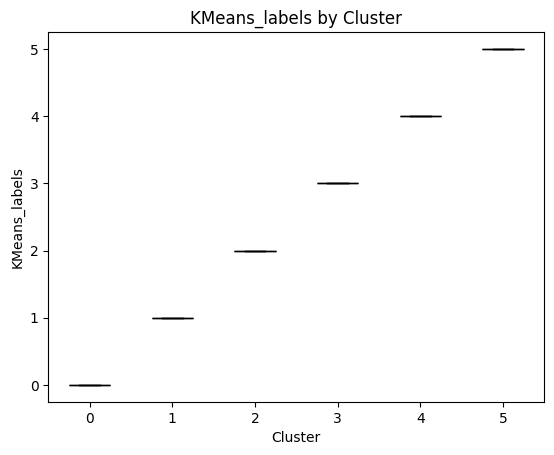

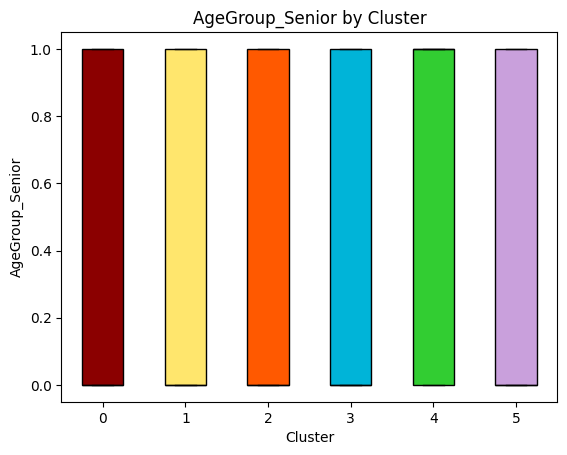

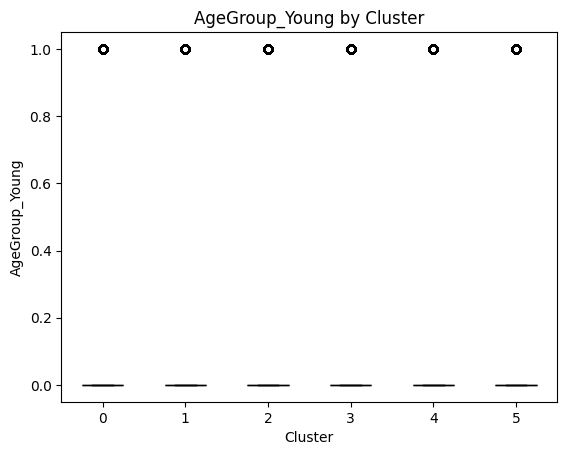

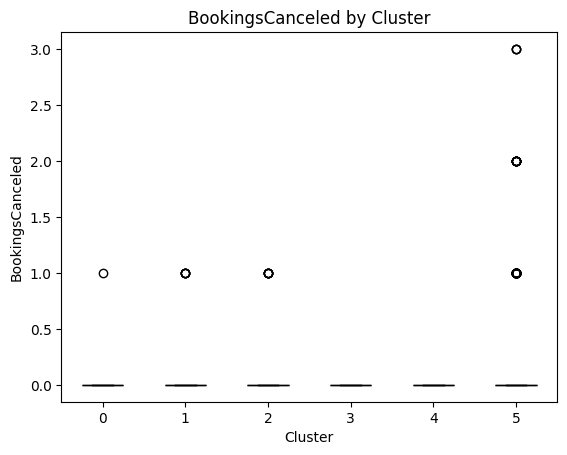

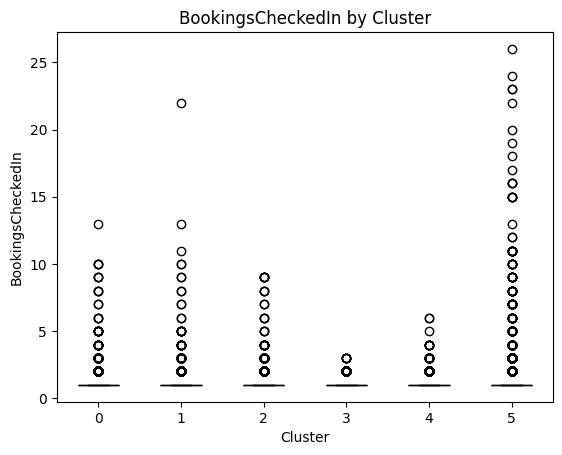

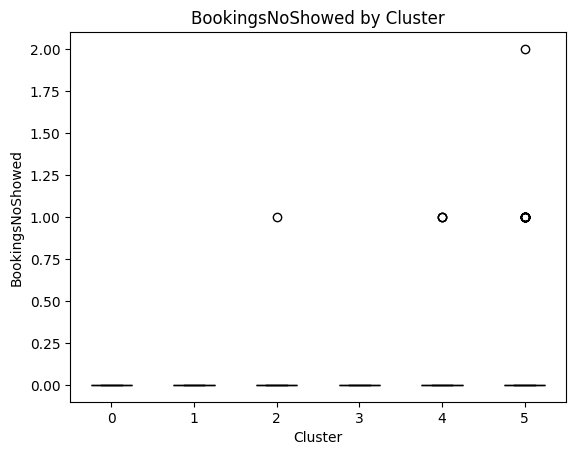

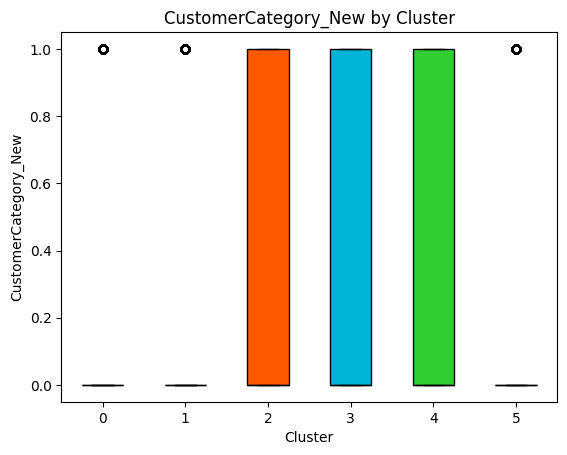

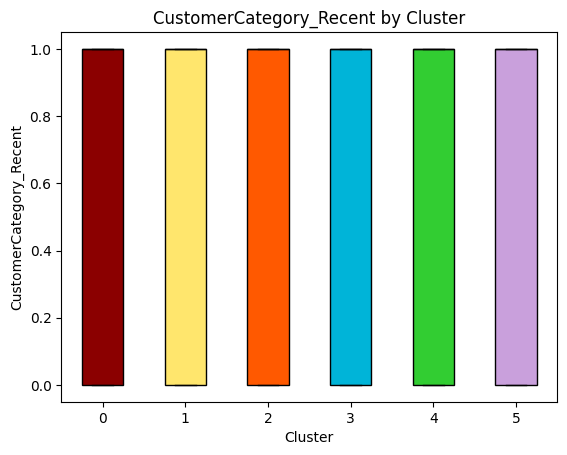

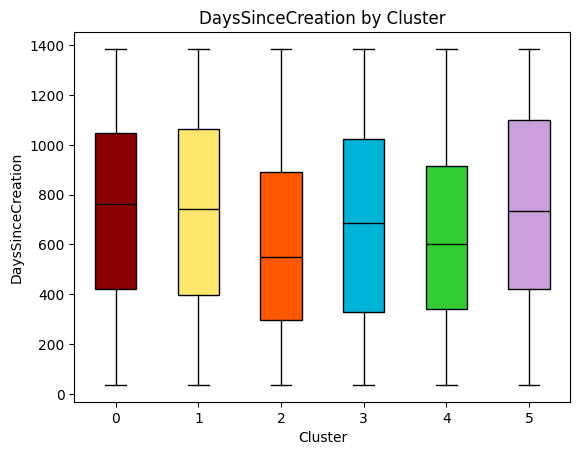

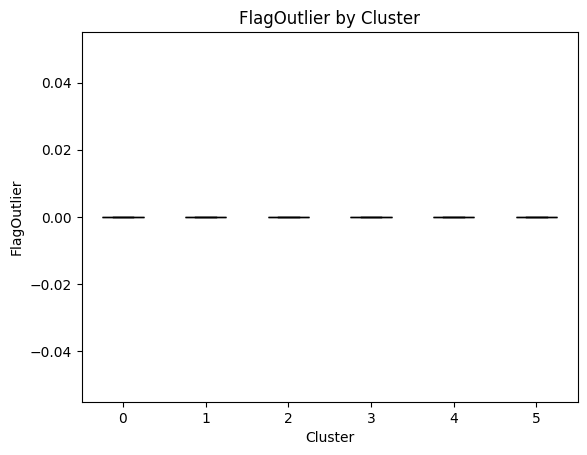

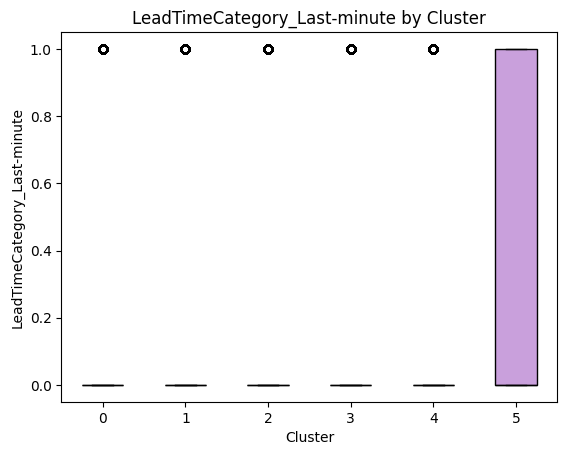

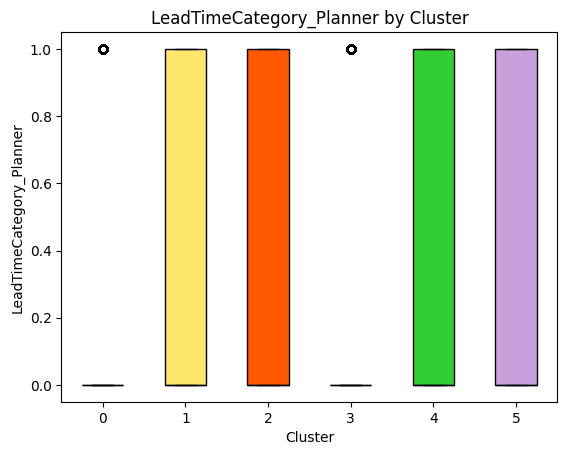

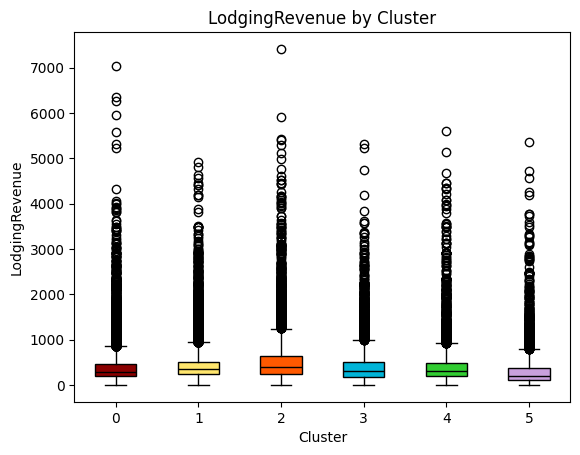

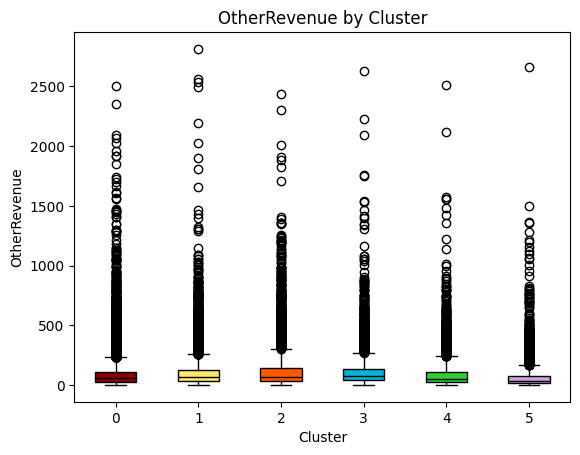

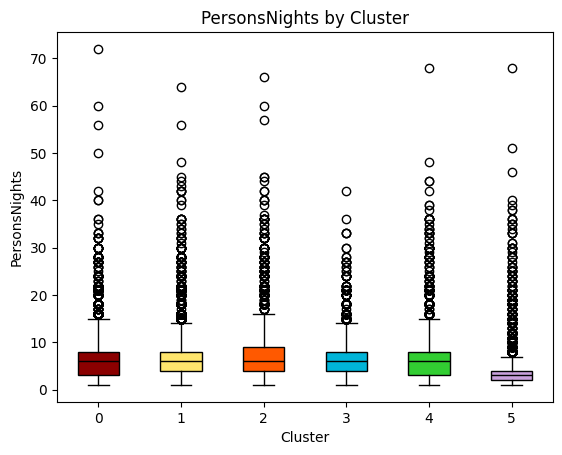

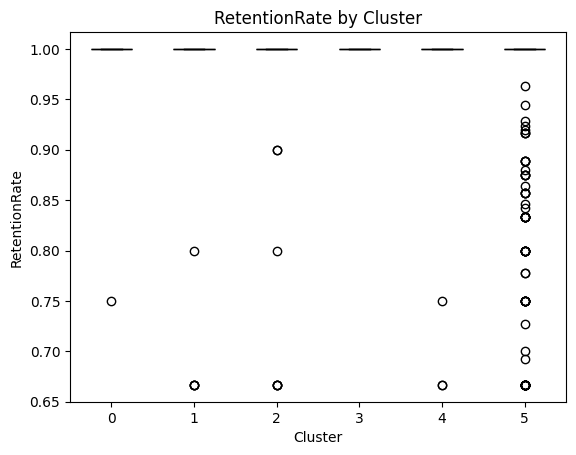

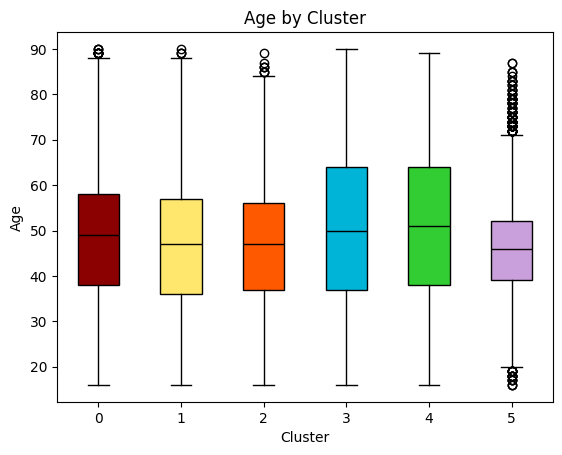

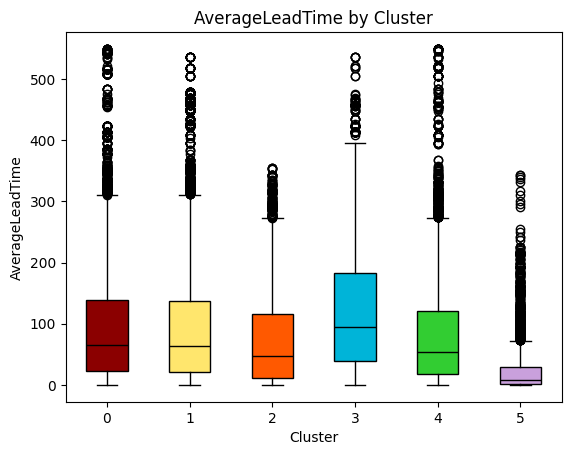

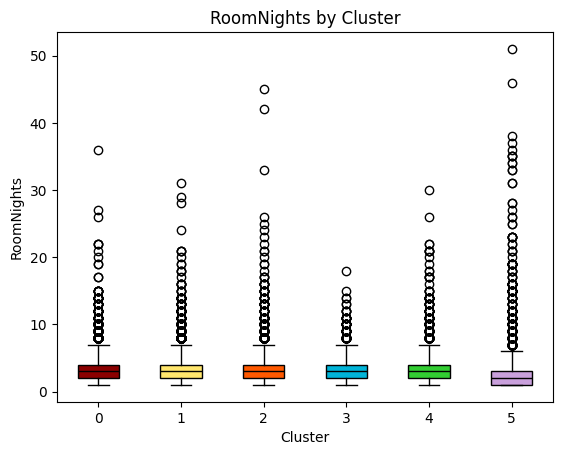

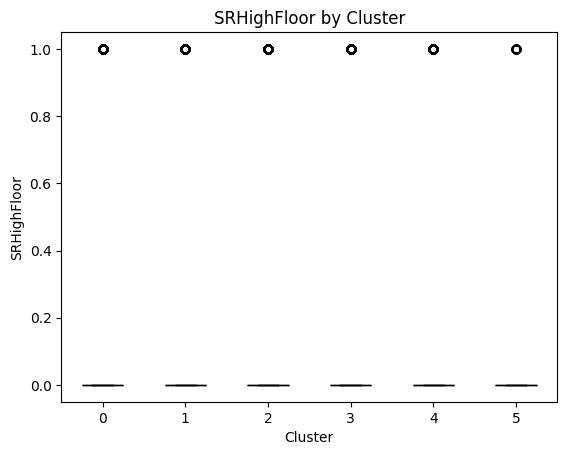

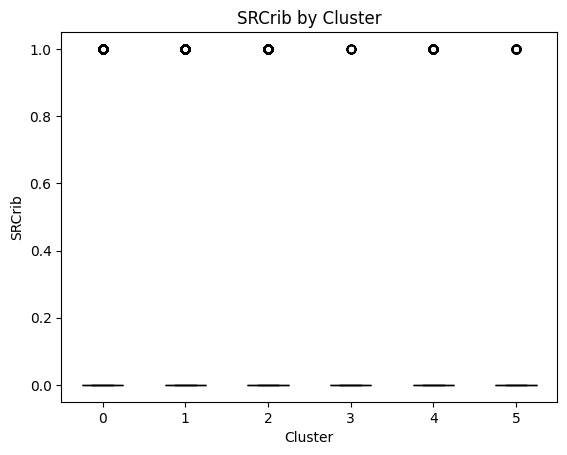

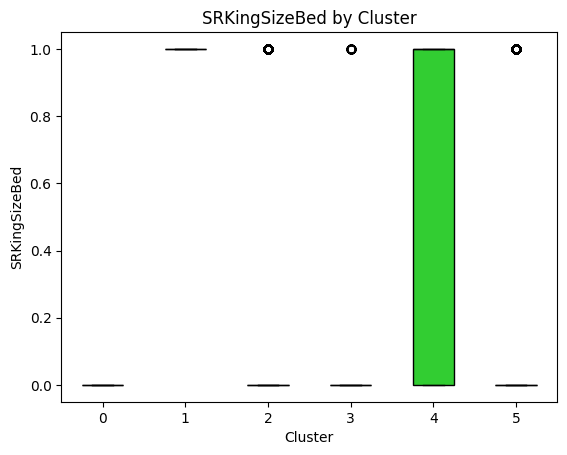

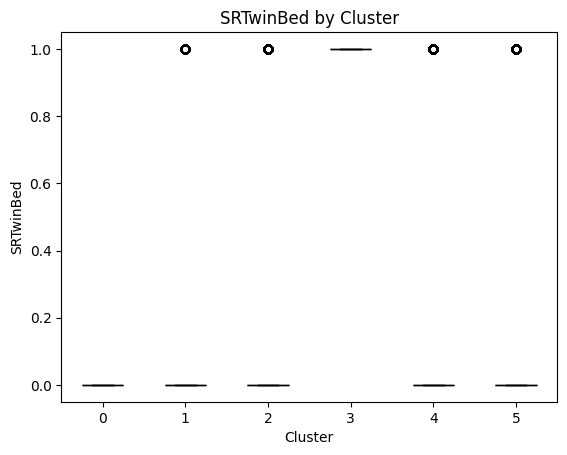

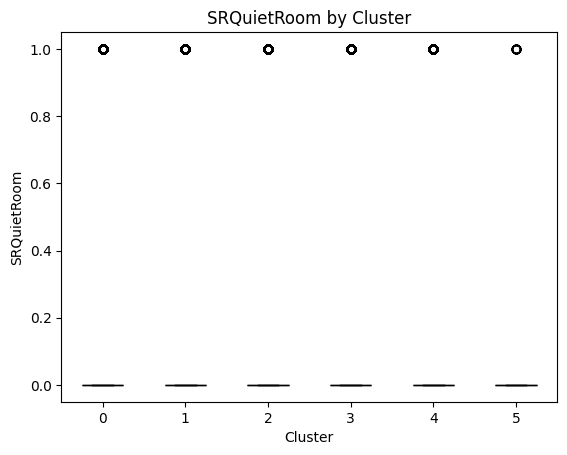

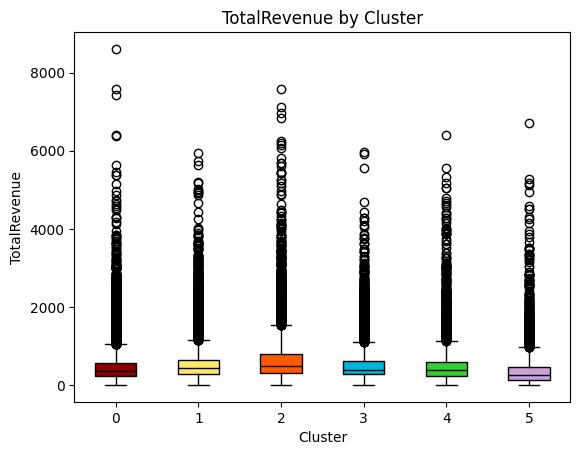

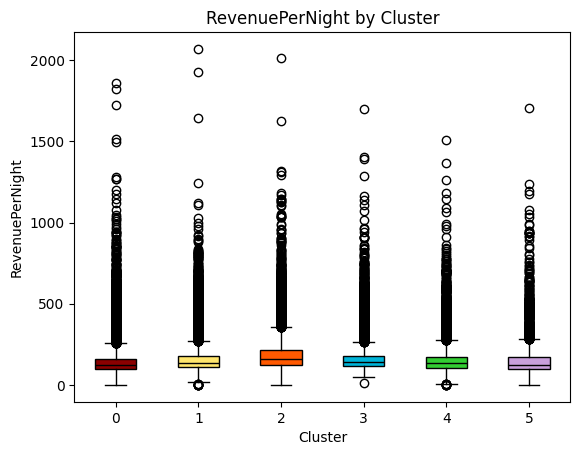

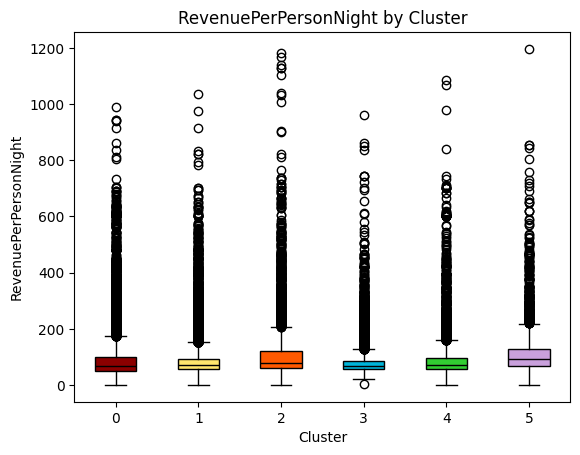

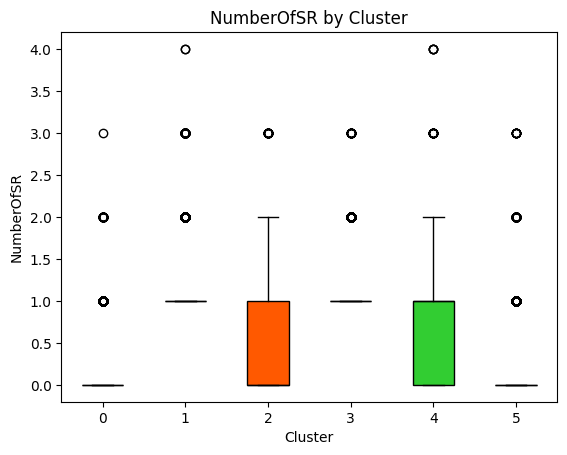

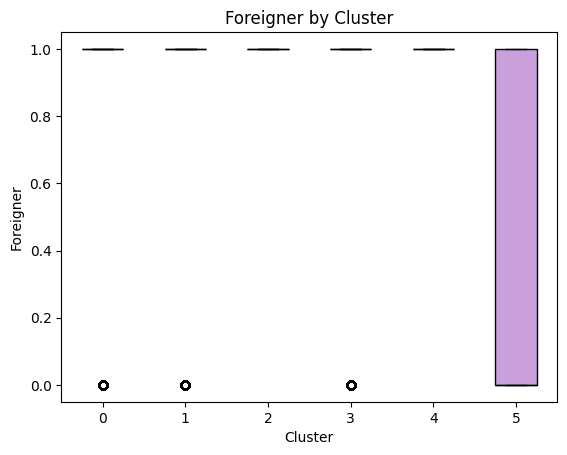

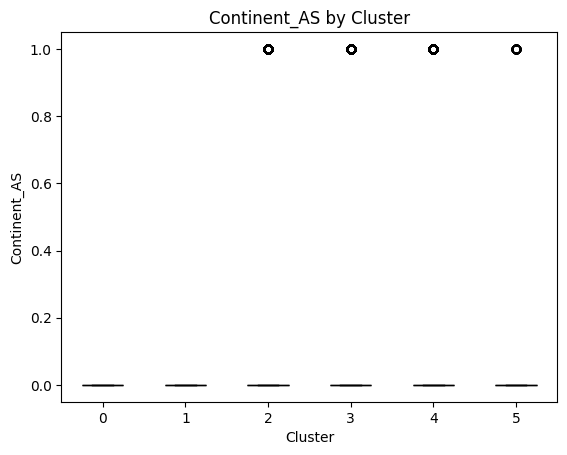

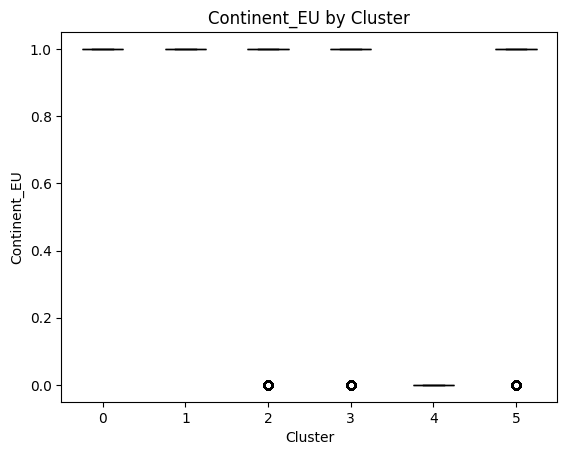

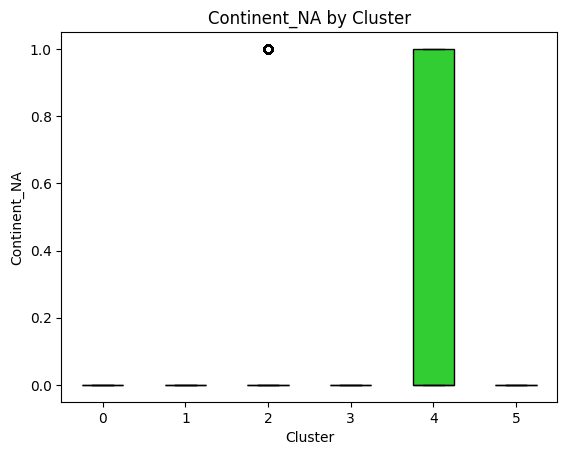

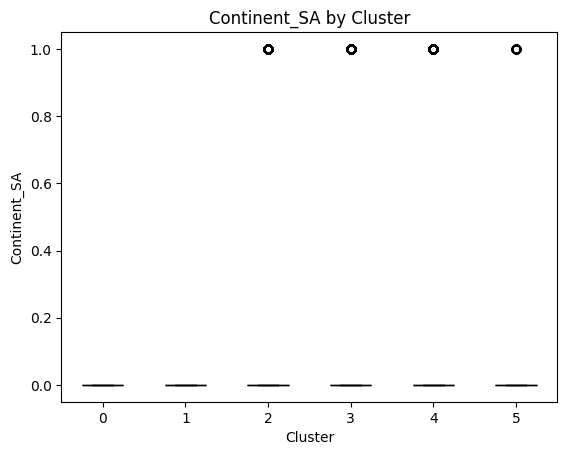

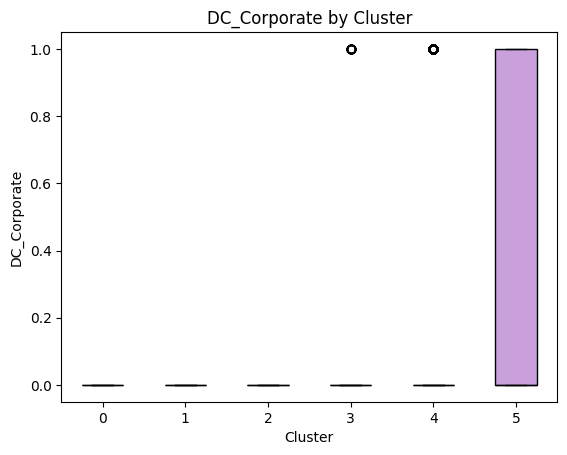

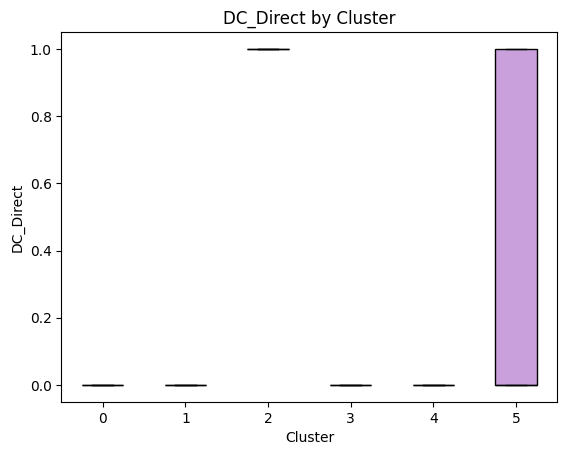

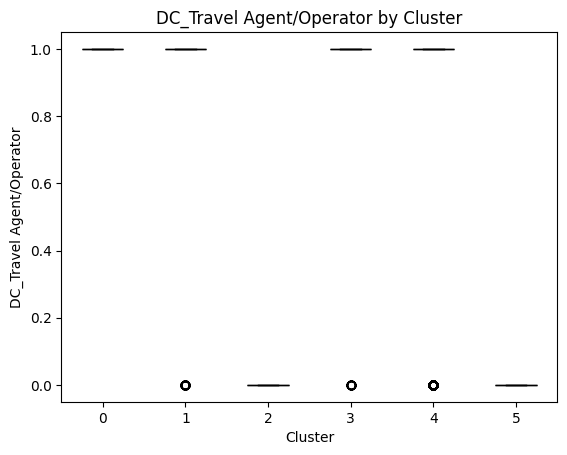

In [102]:
for col in numerical_columns:
    boxplot_color(merged_df, col, color_dict, clusters, 'Cluster', col, f'{col} by Cluster')

In [87]:
first = pd.read_csv('./Case1_HotelCustomerSegmentation.csv', 
                 sep = ';', index_col = 'ID')
first

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.00,82.3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.00,60.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111729,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.00,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
111730,BRA,43.0,36,0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...,0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...,170,755.25,20.0,0,0,...,0,0,0,0,1,0,0,0,0,0
111731,BRA,37.0,36,0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...,0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...,0,0.00,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [88]:
# Find columns unique to each DataFrame
df_unique_columns = df.columns.difference(first.columns)
first_unique_columns = first.columns.difference(df.columns)

# Merge unique columns
merged_df2 = pd.merge(df[df_unique_columns], first[first_unique_columns], left_index=True, right_index=True, how='left')

# Merge common columns (avoiding duplicates)
merged_df2 = merged_df2.join(df[df.columns.intersection(first.columns)], how='left')


In [90]:
non_numerical_columns = merged_df2.select_dtypes(exclude=['number']).columns
non_numerical_columns

Index(['DistributionChannel', 'DocIDHash', 'MarketSegment', 'NameHash',
       'Nationality'],
      dtype='object')

In [97]:
outliers = pd.read_csv('./outliers_with_labels.csv', index_col='Unnamed: 0')
outliers

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,CustomerCategory_Recent,Continent_AS,Continent_EU,Continent_NA,Continent_SA,DC_Corporate,DC_Direct,DC_Travel Agent/Operator,FlagOutlier,KMeans_labels
0,24.0,949.0,7.0,9682.40,1300.00,0.0,0.0,1.0,12.0,6.0,...,1.0,0,0,1,0,0,0,1,1,4
1,74.0,187.0,197.0,336.00,136.50,0.0,0.0,15.0,28.0,28.0,...,0.0,0,1,0,0,0,0,1,1,1
2,56.0,277.0,1.0,390.00,3190.40,0.0,0.0,1.0,5.0,5.0,...,0.0,0,0,1,0,0,1,0,1,2
3,41.0,1295.0,6.0,3910.00,433.50,2.0,1.0,38.0,42.0,42.0,...,0.0,0,1,0,0,1,0,0,1,5
4,72.0,720.0,574.0,468.00,157.10,0.0,0.0,1.0,12.0,6.0,...,1.0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,50.0,427.0,12.0,6431.00,364.00,0.0,0.0,1.0,59.0,59.0,...,1.0,0,1,0,0,1,0,0,1,5
114,41.0,396.0,50.0,288.69,152.07,1.0,0.0,1.0,6.0,3.0,...,1.0,0,1,0,0,0,0,1,1,1
115,63.0,723.0,574.0,234.00,300.50,0.0,0.0,1.0,6.0,3.0,...,1.0,0,1,0,0,0,0,1,1,0
116,52.0,287.0,59.0,395.00,5237.00,0.0,0.0,1.0,5.0,5.0,...,0.0,0,1,0,0,0,0,1,1,0


In [98]:
outliers['KMeans_labels'].value_counts()

KMeans_labels
0    37
5    25
1    22
4    17
2    16
3     1
Name: count, dtype: int64

In [99]:
outliers.groupby('KMeans_labels').mean().T

KMeans_labels,0,1,2,3,4,5
Age,61.513514,51.590909,53.375000,31.0,64.000000,49.320000
DaysSinceCreation,539.135135,755.500000,768.625000,1322.0,694.647059,981.720000
AverageLeadTime,250.648649,26.888936,53.037500,6.0,458.058824,8.190667
LodgingRevenue,1623.511892,4279.070000,2918.734375,53.0,859.176471,1443.978000
OtherRevenue,1520.348108,1325.395000,718.468750,14.0,452.441176,366.240000
BookingsCanceled,0.162162,3.545455,1.562500,0.0,0.117647,1.200000
BookingsNoShowed,0.027027,1.136364,0.187500,1.0,0.000000,0.320000
BookingsCheckedIn,1.027027,28.818182,10.812500,1.0,1.000000,7.920000
PersonsNights,6.108108,55.818182,34.562500,2.0,6.058824,15.800000
RoomNights,3.972973,52.090909,21.750000,1.0,3.117647,14.080000


In [ ]:
numerical_columns = outliers.select_dtypes(include=['number']).columns

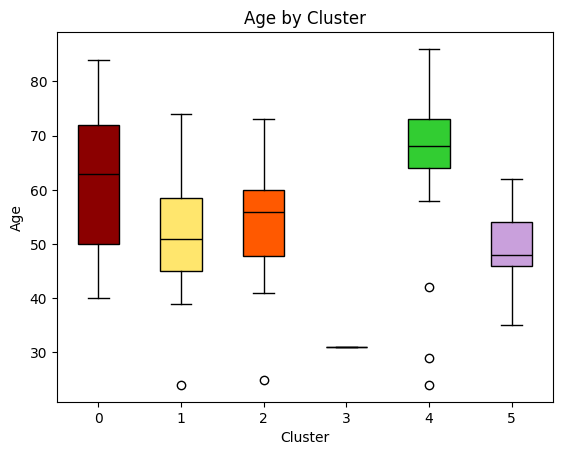

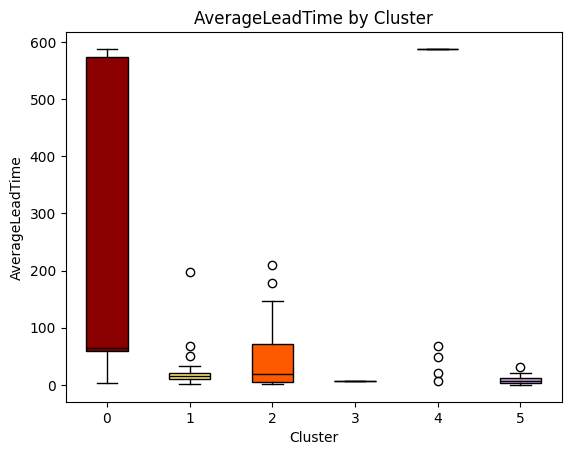

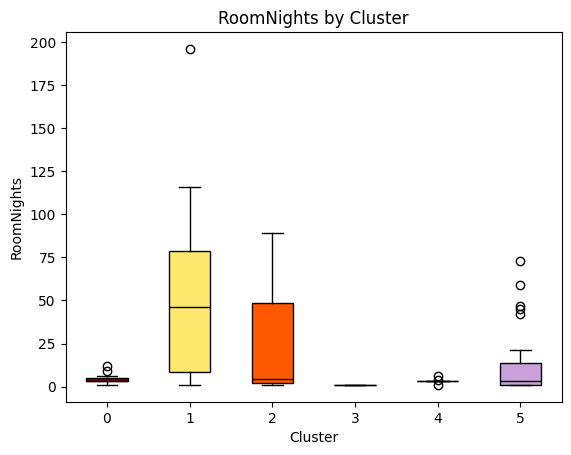

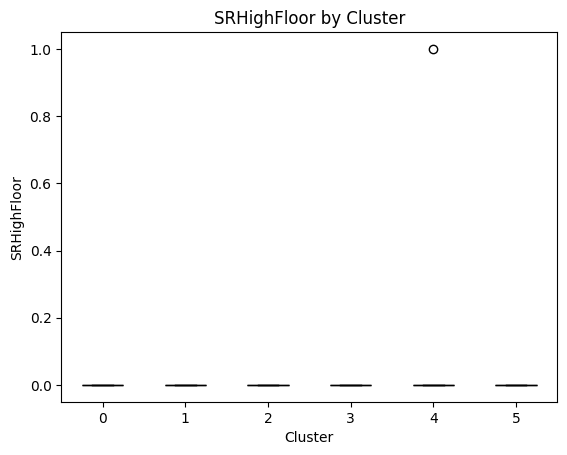

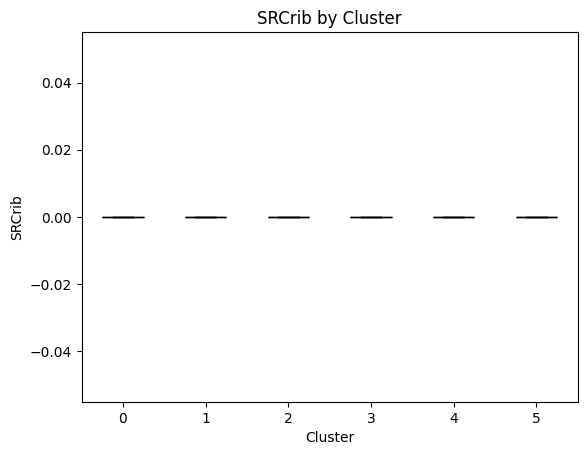

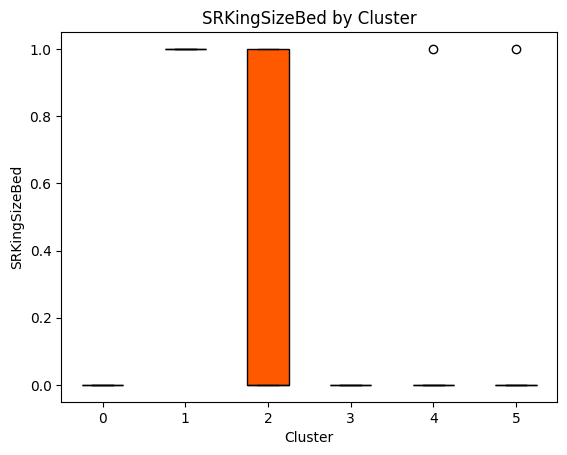

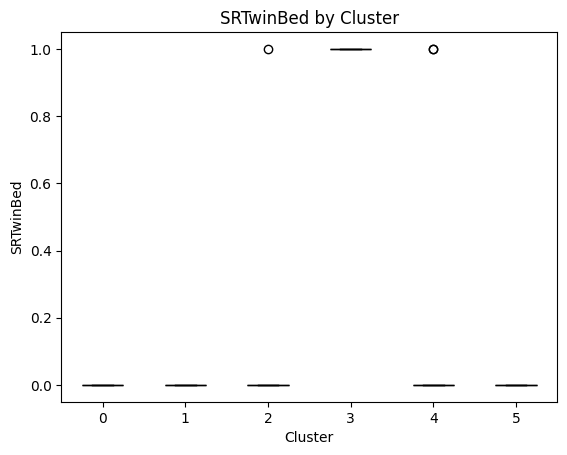

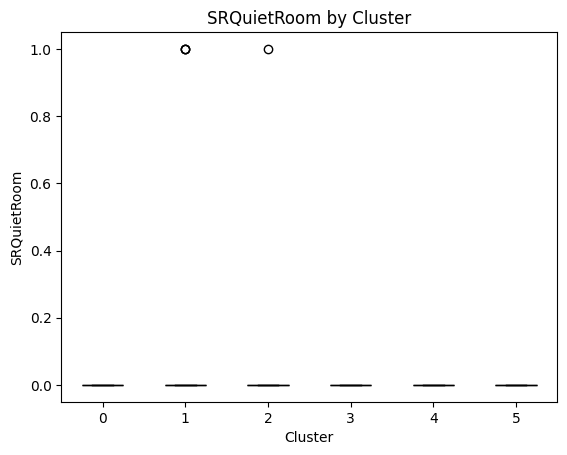

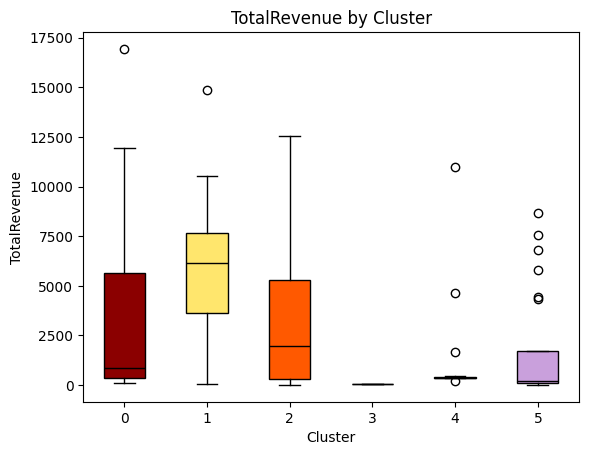

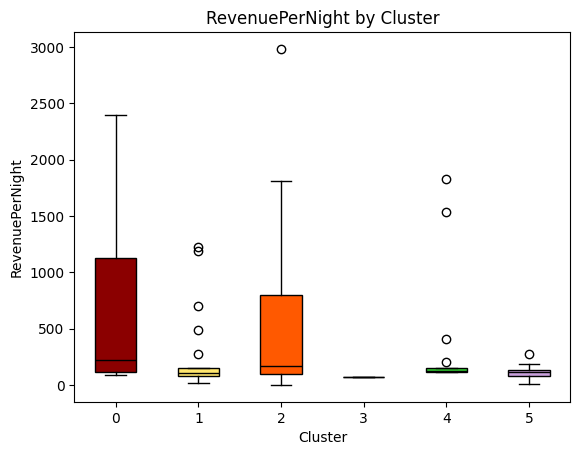

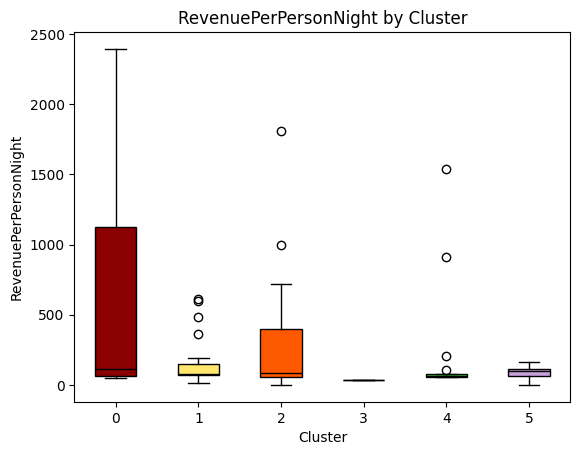

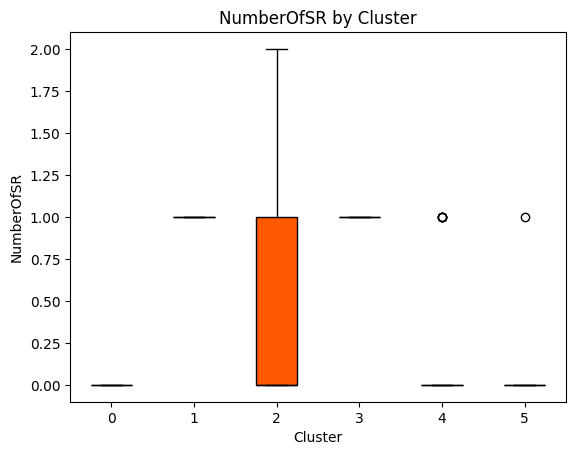

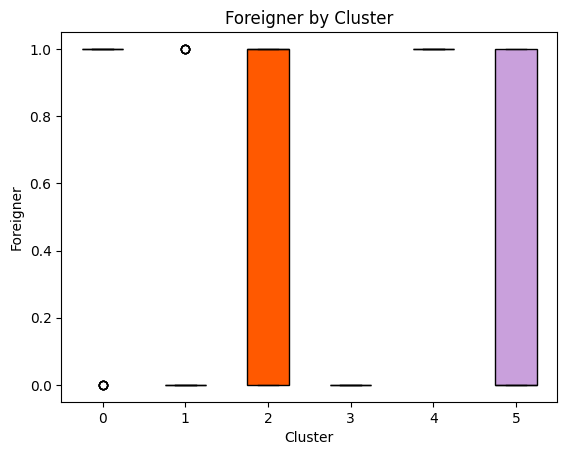

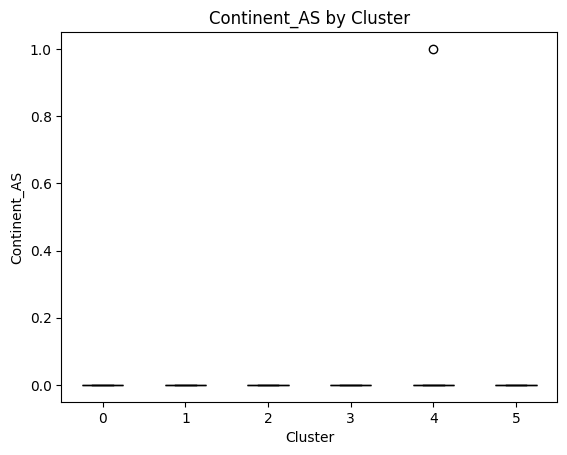

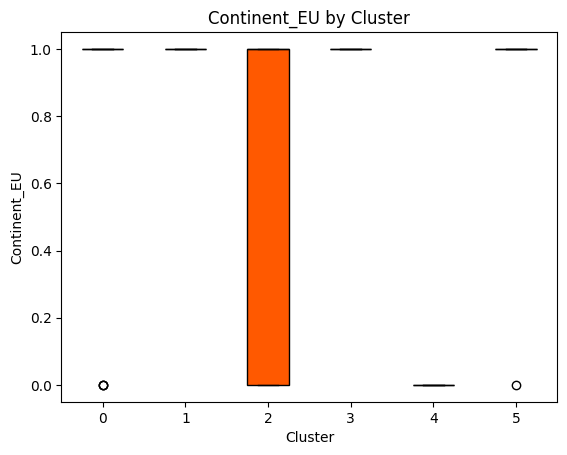

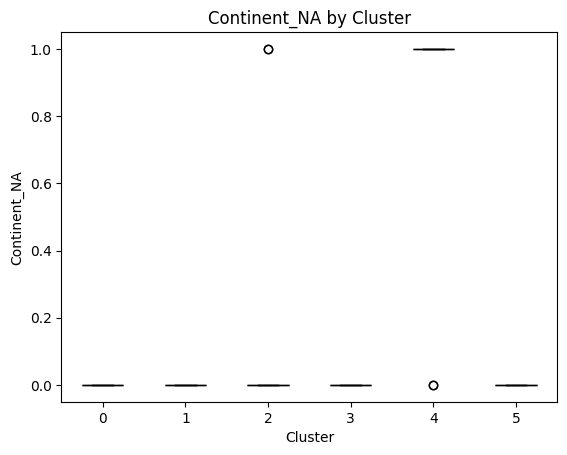

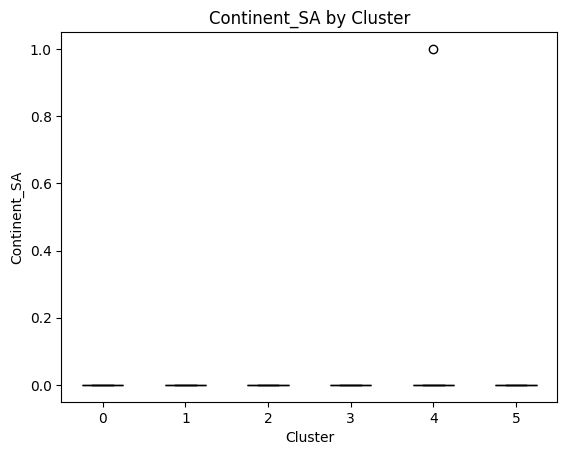

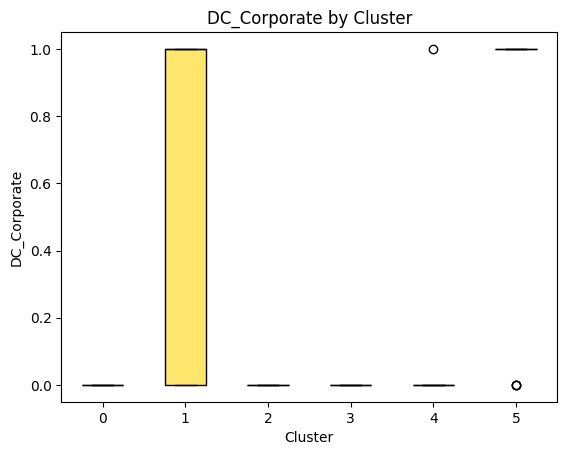

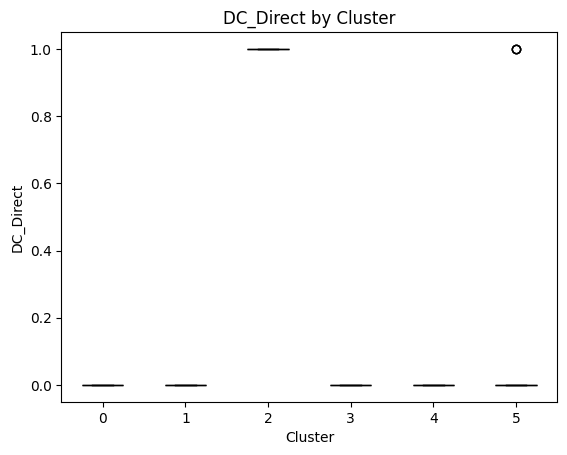

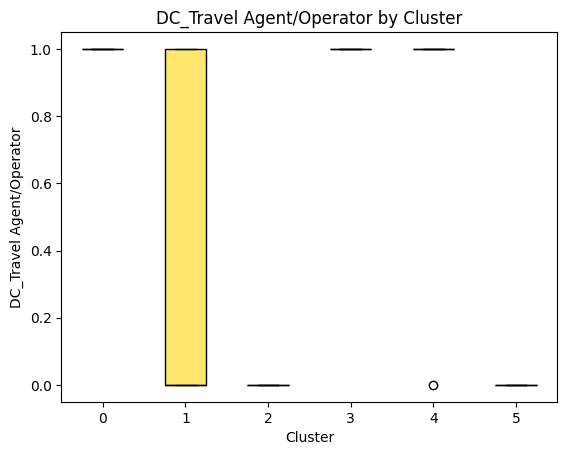

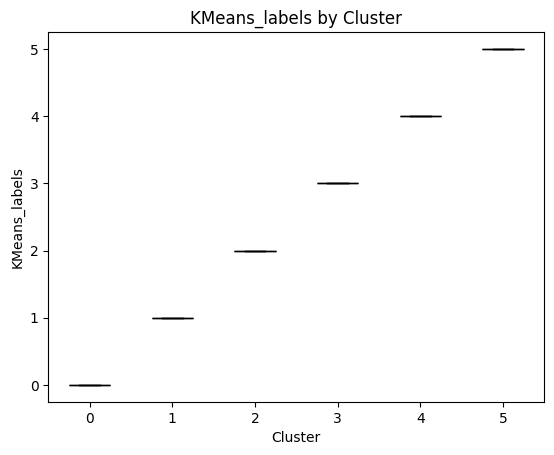

In [100]:
for col in numerical_columns:
    boxplot_color(outliers, col, color_dict, clusters, 'Cluster', col, f'{col} by Cluster')